In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats


In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('Datasets/moved_games.csv')

In [3]:
df.shape

(16715, 11)

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df = df.rename(columns={
    'Name':'name', 
    'Platform':'platform', 
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales', 
    'EU_sales':'eu_sales', 
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating',
})

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df = df.dropna(subset=['name','year_of_release'])

In [10]:
df['year_of_release'].isna().sum()

0

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [13]:
df['rating'] = df['rating'].fillna('unknown')

In [14]:
df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: object

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [17]:
df['user_score'] = df['user_score'].astype('float')

In [18]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [19]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [20]:
df['jp_sales'] + df['na_sales'] + df['eu_sales'] + df['other_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Length: 16444, dtype: float64

In [21]:
df['total_sales'] = df['jp_sales'] + df['na_sales'] + df['eu_sales'] + df['other_sales']

<div class="alert alert-info">
<p>all sales were considered for the total sales column I took the 3 major markets we are in and the other sales. which were not specific of where they were made!<p/>
</div>

In [22]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [23]:
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

In [24]:
df.reset_index(inplace=True)

In [25]:
df = df.drop(columns=['index'])

In [26]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


<div class="alert alert-info">
    In the data cleaning above I found the shape of the dataframe which was 16715 rows and 11 columns 
when I looked at columns I saw they were not insync with how they were named 
so I renamed them all to be lowercases. 

upon my inspection I eliminated the data of no year release and name values which was 
less then 1.5 percent so it would not effect the data I changed the year_of_release
column to a int dtype and filled the 
there is alot of missing data in a few areas of this dataframe. which could be caused by many reasons
it could be mainly from us messing up, incomplete upon receiving or just a collection issue. I saw 
the rating had missing values and made those unknown. 
I did not worry about cleaning and eliminating the nan values in the critic_score column and the
user_score column. I felt as though if I filled them with a average it could alter results.
and if they are nan your not having the ability to taint the data.
within the user_score i saw there was a tbd value so i made it -1 because all the results were
above one so I then went and changed the code to only accept the results thata were greater then 
1! finally I added the 3 sales columns of na_sales, eu_sales, and jp_sales together to create a new 
column called total_sales.  
</div>

<div class="alert alert-info"><h2>Analyze The Data</h2></div>  

In [27]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<div class="alert alert-info">
From the data above the data after 2001 is way more significant. 
</div>
    

In [28]:
pl_df = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).reset_index()

In [29]:
pl_df['platform'].unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

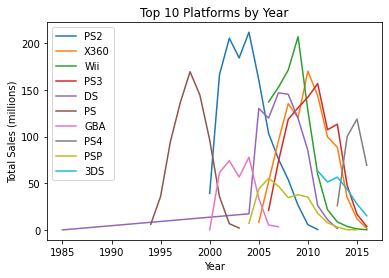

In [30]:
top_ten_pl = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS']
filt_df = df[df['platform'].isin(top_ten_pl)]

total_sales_filt = filt_df.groupby(['year_of_release', 'platform'])[['total_sales']].sum().reset_index()

for platform in top_ten_pl:
    pl_df = total_sales_filt[total_sales_filt['platform'] == platform]
    plt.plot(pl_df['year_of_release'], pl_df['total_sales'], label=platform)


plt.title('Top 10 Platforms by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')

plt.legend()
plt.show()
    

In [31]:
filt_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


<div class="alert alert-info">
    this line chart represents the 10 most profitable systemes in total sales which is including the three main markets.
    it also shows where the sales started to decline to zero. 
</div>

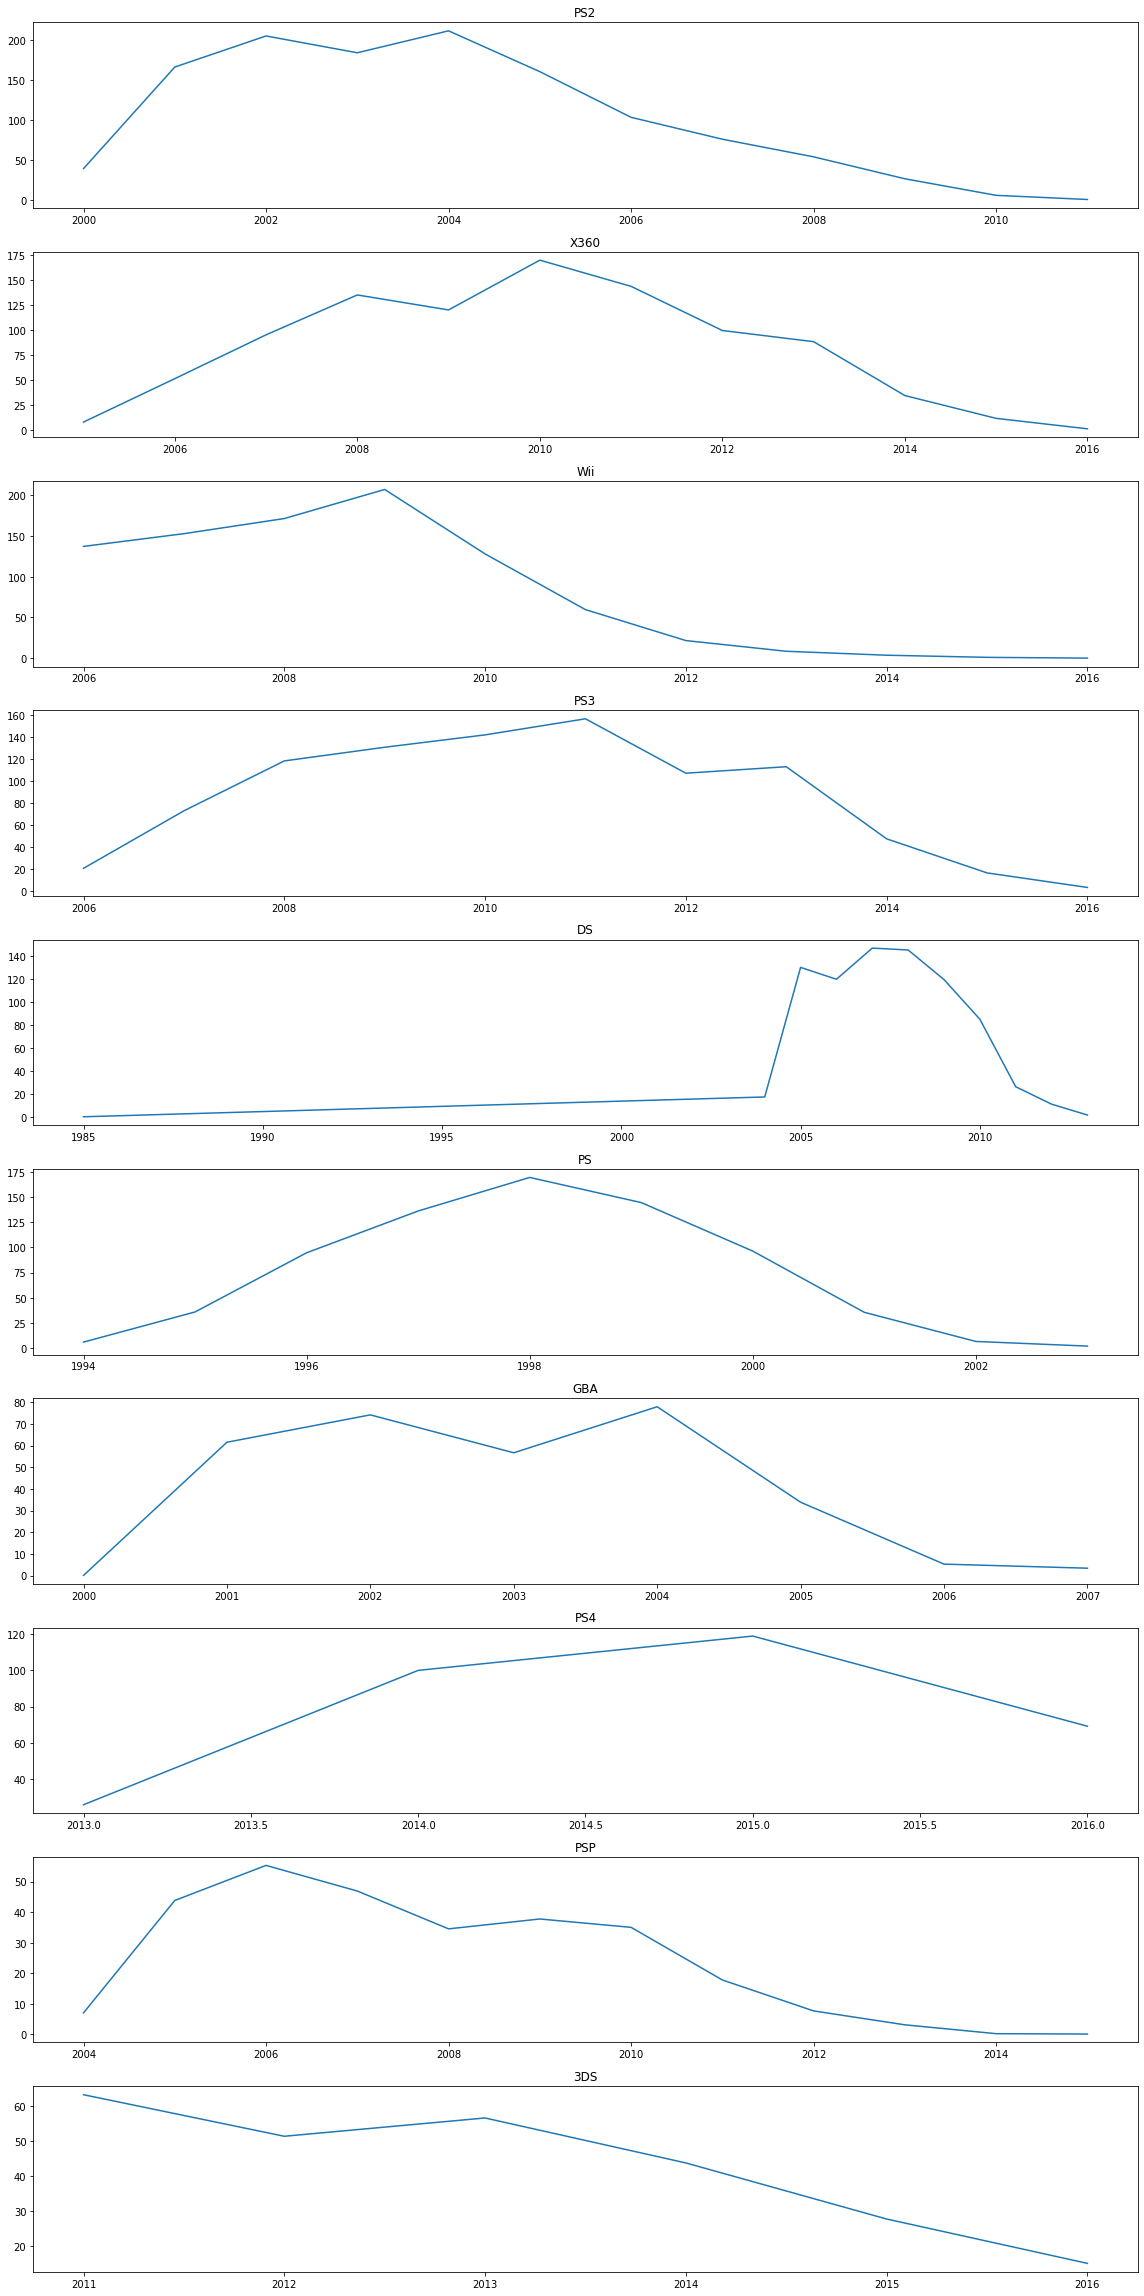

In [32]:


# Create pivot tables for each platform
pivot_tables = {}
for platform in top_ten_pl:
    pl_df = total_sales_filt[total_sales_filt['platform'] == platform]
    pivot_tables[platform] = pl_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# Plot pivot tables
fig, axs = plt.subplots(nrows=len(top_ten_pl), figsize=(16, 32))

for i, platform in enumerate(top_ten_pl):
    pivot_table = pivot_tables[platform]
    axs[i].plot(pivot_table.index, pivot_table['total_sales'])
    axs[i].set_title(platform)

plt.tight_layout()
plt.show()


<div class="alert alert-info">
    these pivot tables display the top ten performing platforms in the dataframe we have and showcases where they ended up having zero sales. The GB, PSP, GBA, PS, DS, and PS2 are all examples of game platforms that had great sales and then ended up dropping to zero. It seems like a age of a system before it is fully zero is somewhere in the 7-8 year mark. It generally 
    looks like it takes a good 2-4 years for the sales to steadily incline. and new ones come out around about every 10 years and the old ones take a good 2 years to completely fade. the game industry from this data does look like it changes alot. so I believe a good gage for 2017 projections would be about 2 years out. just because we dont care about majority of the systems that have already faded out. and we are possibly entering a rise of a bunch of new systems starting to come into market in the next year or two sense we seem to be at the end of these companies other systems being on the end of their life cycle. The main ones that are growing is mainly going to be the ps4. which from top performers seems like one of the best systems to have growth potential. where now x360 and the wii are almost fully faded out. 
</div>

In [33]:
past_three_yrs = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]
pl_grow = past_three_yrs.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
pl_sales = past_three_yrs.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()
pl_growth = pl_sales[2016] - pl_sales[2014]

pl_growth.sort_values(ascending=False)

platform
Wii     -3.57
PSV     -7.65
PC      -8.03
WiiU   -17.43
XOne   -27.92
3DS    -28.62
PS4    -30.75
X360   -33.22
PS3    -44.16
PSP       NaN
dtype: float64

In [34]:
past_three_yrs = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

# Total sales by platform
pl_sales = past_three_yrs.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

# Growth calculation
pl_growth = pl_sales[2016] - pl_sales[2014]

# Sorting by growth
pl_growth_sorted = pl_growth.sort_values(ascending=False)

# Print the pivot tables
print("Total Sales by Platform:")
print(pl_sales)

print("\nGrowth by Platform:")
print(pl_growth_sorted)

Total Sales by Platform:
year_of_release    2014    2015   2016
platform                              
3DS               43.76   27.78  15.14
PC                13.28    8.52   5.25
PS3               47.76   16.82   3.60
PS4              100.00  118.90  69.25
PSP                0.24    0.12    NaN
PSV               11.90    6.25   4.25
Wii                3.75    1.14   0.18
WiiU              22.03   16.35   4.60
X360              34.74   11.96   1.52
XOne              54.07   60.14  26.15

Growth by Platform:
platform
Wii     -3.57
PSV     -7.65
PC      -8.03
WiiU   -17.43
XOne   -27.92
3DS    -28.62
PS4    -30.75
X360   -33.22
PS3    -44.16
PSP       NaN
dtype: float64


In [35]:


pl_yrs_active = total_sales_filt.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False)
pl_yrs_active

platform
PS2     12
PSP     12
X360    12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: year_of_release, dtype: int64

In [36]:
pl_yrs_active = round(pl_yrs_active.mean(), 2)
pl_yrs_active

9.7

<div class="alert alert-info">
    The code above supports the ps4 rising and the Wii and x360 fading. the reason the ps4 is down 40 million is because it did not hit the total_sales in all its regions compared to the prior 2 years. The most prominent new platform in its growing stages is PS4 and Xboxone.
</div>

In [37]:
# Reviewer's code 2

df.query('year_of_release>2011').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<div class="alert alert-info">
    From this box plot it displays that the median is a 3 million dollar loss. the reason for this is that we could be at the end of many of these now older systems in their fade out phase and the rise of new platforms coming out and to build new growth potential for the future. 
</div>

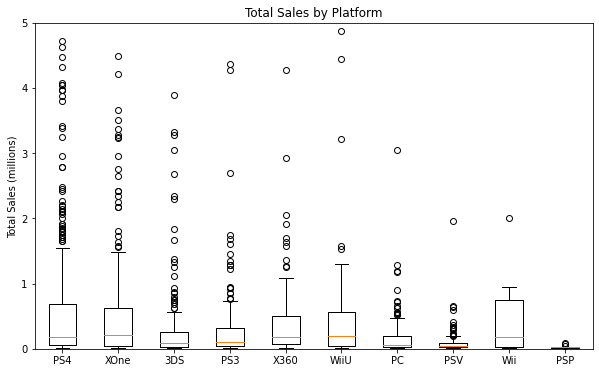

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([past_three_yrs[past_three_yrs['platform'] == p]['total_sales'] for p in pl_grow.index])
ax.set_xticklabels(pl_grow.index)
ax.set_title('Total Sales by Platform')
ax.set_ylabel('Total Sales (millions)')
ax.set_ylim(0,5)

plt.show()

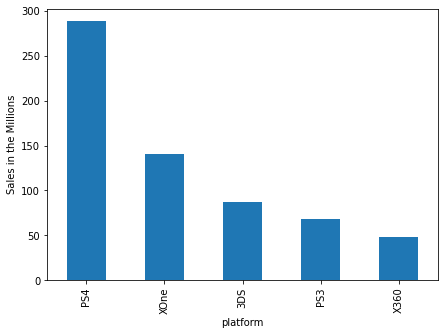

In [39]:
pl_grow = pl_grow.head()
pl_grow.plot(kind='bar', figsize=(7,5), ylabel='Sales in the Millions')
plt.show()

<div class="alert alert-info">
<p>I attempted to use the ylim. I did not really see a increase in the box size until I reached a 5 for the limit. My question to you is does chopping off the 6 - 14 in the range aspect make a huge difference sense all those plotted points were so heavy outside the box plot? <p/>
</div>

In [40]:
pl_grow.describe()

count      5.000000
mean     126.318000
std       96.743565
min       48.220000
25%       68.180000
50%       86.680000
75%      140.360000
max      288.150000
Name: total_sales, dtype: float64

<div class="alert alert-info">

The sales diffences is 4.64 million from eachother. which when we are in the millions like they are its not
that much of a significance 
    
</div>

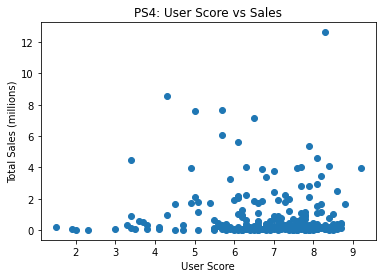

This is the correlation for user score and the sales: -0.040131589472697356


In [41]:
ps4_data = past_three_yrs[past_three_yrs['platform'] == 'PS4']

plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('PS4: User Score vs Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

user_cor = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('This is the correlation for user score and the sales:', user_cor) 

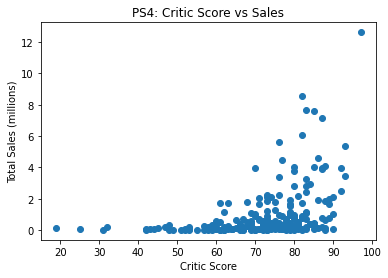

This is the correlation between the critic score and the sales: 0.402661410681041


In [42]:
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('PS4: Critic Score vs Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

crit_cor = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('This is the correlation between the critic score and the sales:', crit_cor)

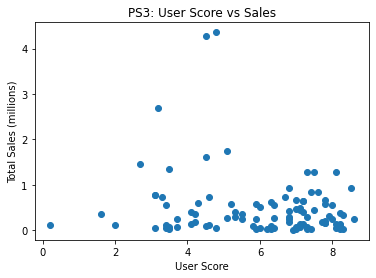

This is the correlation for user score and the sales: -0.16676141347662118


In [43]:
ps3_data = past_three_yrs[past_three_yrs['platform'] == 'PS3']

plt.scatter(ps3_data['user_score'], ps3_data['total_sales'])
plt.title('PS3: User Score vs Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

user_cor = ps3_data['user_score'].corr(ps3_data['total_sales'])
print('This is the correlation for user score and the sales:', user_cor)

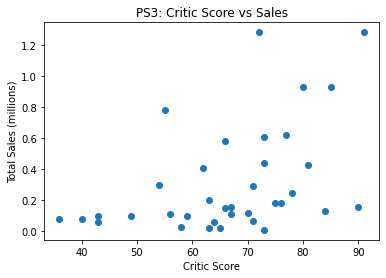

This is the correlation between the critic score and the sales: 0.44657460493190704


In [44]:
plt.scatter(ps3_data['critic_score'], ps3_data['total_sales'])
plt.title('PS3: Critic Score vs Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

crit_cor = ps3_data['critic_score'].corr(ps3_data['total_sales'])
print('This is the correlation between the critic score and the sales:', crit_cor)

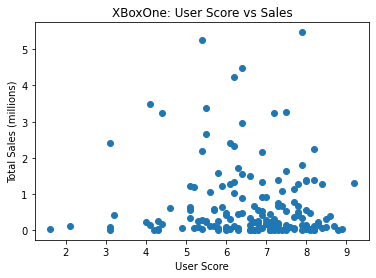

This is the correlation for user score and the sales: -0.0703839280647581


In [45]:
xboxone_data = past_three_yrs[past_three_yrs['platform'] == 'XOne']

plt.scatter(xboxone_data['user_score'], xboxone_data['total_sales'])
plt.title('XBoxOne: User Score vs Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

user_cor = xboxone_data['user_score'].corr(xboxone_data['total_sales'])
print('This is the correlation for user score and the sales:', user_cor)

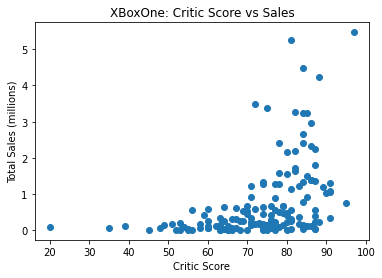

This is the correlation between the critic score and the sales: 0.42867694370333226


In [46]:
plt.scatter(xboxone_data['critic_score'], xboxone_data['total_sales'])
plt.title('XBoxOne: Critic Score vs Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

crit_cor = xboxone_data['critic_score'].corr(xboxone_data['total_sales'])
print('This is the correlation between the critic score and the sales:', crit_cor)

<div class="alert alert-info">
    From the above data critic score and user score do not have a huge influence in the total sales.
</div>

In [47]:

name_sales = past_three_yrs.groupby('name')['total_sales'].sum().sort_values(ascending=False)
top_games = name_sales.head(10)

top_games

name
Call of Duty: Black Ops 3              25.67
Call of Duty: Advanced Warfare         21.97
Grand Theft Auto V                     19.26
FIFA 15                                17.37
FIFA 16                                16.30
Minecraft                              14.98
Fallout 4                              12.67
Destiny                                12.54
Super Smash Bros. for Wii U and 3DS    12.42
Star Wars Battlefront (2015)           12.19
Name: total_sales, dtype: float64

In [48]:
CoD = past_three_yrs[past_three_yrs['name'] == 'Call of Duty: Black Ops 3']
CoD

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1038,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,unknown,1.70
1051,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,unknown,1.69
6363,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,unknown,0.26


In [49]:
pl_grow = pl_grow.head()
pl_grow

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64

In [50]:
top_5_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

CoD = past_three_yrs[(past_three_yrs['name'] == 'Call of Duty: Black Ops 3') & (past_three_yrs['platform'].isin(top_5_platforms))]
CoD

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1038,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,unknown,1.70
1051,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,unknown,1.69


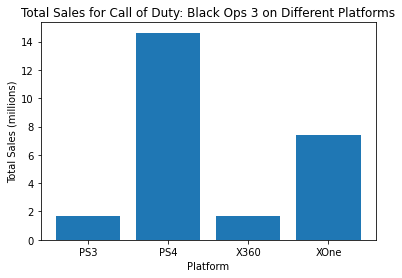

In [51]:
CoD_sales = CoD.groupby('platform')['total_sales'].sum()
plt.bar(CoD_sales.index, CoD_sales.values)
plt.title('Total Sales for Call of Duty: Black Ops 3 on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.show()

<div class="alert alert-info">
    In the call of duty example above. specific games seem like they are targeted to sell better for specific platforms then others. it could be mainy reasons for this. some platforms may have better advantages in some aspects paired with games. a platform could specialize in multiplayer maybe specific game titles will have more competitions on the platform which is popular or maybe a game is specifically known better to be played on one platform than another. none of it is bad it just depends on which niche market the game was going for and who their target demographic is.
</div>

In [52]:
gen_sales = past_three_yrs.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
gen_sales

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

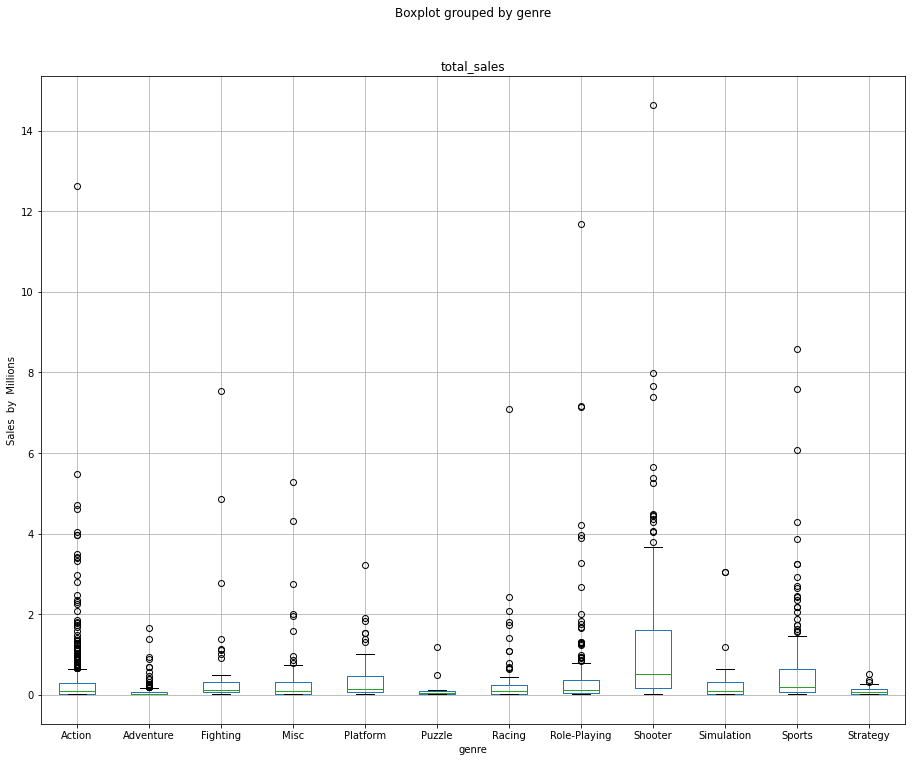

In [53]:
past_three_yrs.boxplot(column='total_sales', by='genre', figsize= (15,12))
plt.ylabel('Sales  by  Millions')

plt.show()

<div class="alert alert-info">
    From this data above the action games do actually make the most sales but its because they make the most games. the people are willing to pay for shooter games because they are more scarce which leads them to have fewer games but yet way more sales.
The median for sales of shooter is the highest median. Role-playing, Adventure, and Sports follow, in production and sales The box plot shows the distribution of sales. which in turn makes shooters great to add to our store in the upcoming year just because if one comes out there is a great chance it will yield great revenue. 
</div>

In [54]:
top_gen_sales = gen_sales.head()
top_gen_sales

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: total_sales, dtype: float64

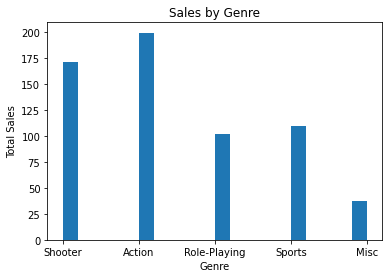

In [55]:
top_gen_sales = gen_sales.head().index.tolist()
top_gen_df = past_three_yrs[past_three_yrs['genre'].isin(top_gen_sales)]


plt.hist(top_gen_df['genre'], bins=20, weights=top_gen_df['total_sales'])
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

<div class="alert alert-info">
    From this data above these are the top 5 categories where action is a very broad identity of games. which can be played in many variations and styles which draws audiences of all ages as well as sports. shooters start getting into more of a target audience but with the growth of professional play as well
</div>

In [56]:
bot_gen = gen_sales.nsmallest()
bot_gen

genre
Puzzle         2.21
Strategy       3.96
Simulation    13.13
Adventure     17.55
Platform      18.09
Name: total_sales, dtype: float64

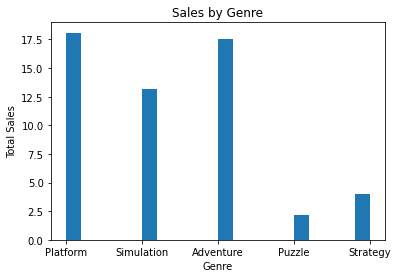

In [57]:
bot_gen = gen_sales.nsmallest().index.tolist()

bot_gen_df = past_three_yrs[past_three_yrs['genre'].isin(bot_gen)]

plt.hist(bot_gen_df['genre'], bins=20, weights=bot_gen_df['total_sales'])
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()



<div class="alert alert-info">
 in the graph above. its the bottom 5 genres each of them are very niched and strategy is the lowest just because it could be only capturing a very specific target audience. 
</div>

In [58]:
na_plat = past_three_yrs.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_plat = past_three_yrs.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jap_plat = past_three_yrs.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

display(na_plat)
display(eu_plat)
display(jap_plat)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

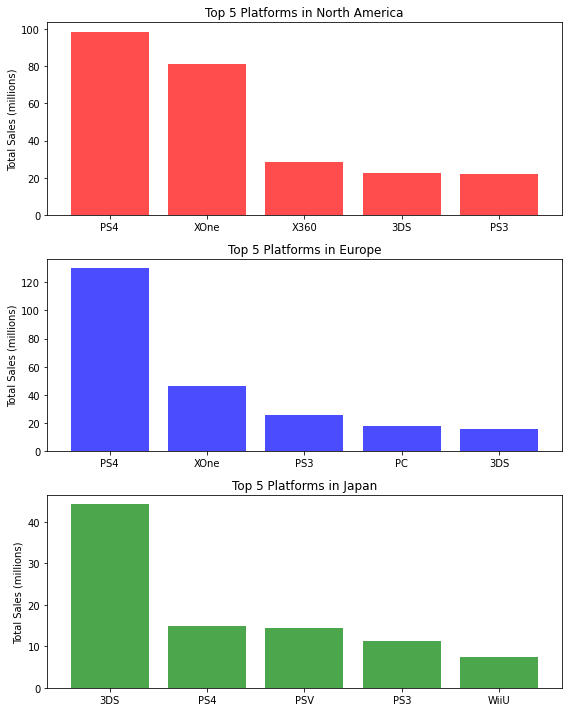

In [59]:

# Platforms by region
na_plat = past_three_yrs.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_plat = past_three_yrs.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jap_plat = past_three_yrs.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Create figure and axis objects
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 10))

# North America Platforms
ax1.bar(na_plat.index, na_plat.values, color='red', alpha=0.7)
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('Top 5 Platforms in North America')

# Europe Platforms
ax2.bar(eu_plat.index, eu_plat.values, color='blue', alpha=0.7)
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('Top 5 Platforms in Europe')

# Japan Platforms
ax3.bar(jap_plat.index, jap_plat.values, color='green', alpha=0.7)
ax3.set_ylabel('Total Sales (millions)')
ax3.set_title('Top 5 Platforms in Japan')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<div class="alert alert-info">
   From the data above the NA region seems to have much greater sales. which could mean that the market is just that much larger
    then the eu and jp markets or that the video game industry is more prominent within that region then the others. futher digging would be required in order to really get into the data to see which one of these it truely is. 
</div>

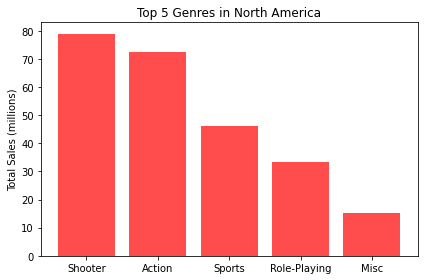

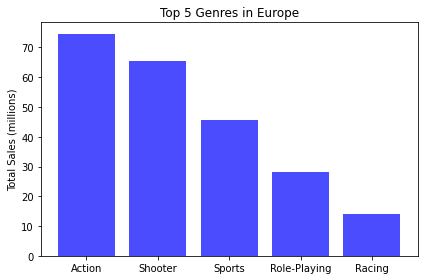

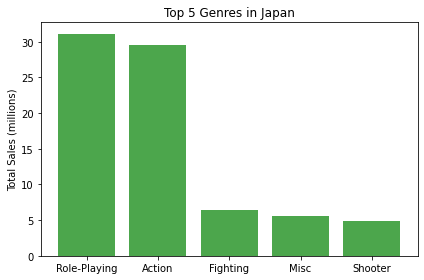

In [60]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 4))

na_genres = past_three_yrs.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
ax1.bar(np.arange(len(na_genres)), na_genres.values, color='red', alpha=0.7)
ax1.set_xticks(np.arange(len(na_genres)))
ax1.set_xticklabels(na_genres.index)
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('Top 5 Genres in North America')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Create figure and axis objects for EU sales by genre
fig, (ax2) = plt.subplots(nrows=1, figsize=(6, 4))

eu_genres = past_three_yrs.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
ax2.bar(np.arange(len(eu_genres)), eu_genres.values, color='blue', alpha=0.7)
ax2.set_xticks(np.arange(len(eu_genres)))
ax2.set_xticklabels(eu_genres.index)
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('Top 5 Genres in Europe')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Create figure and axis objects for JP sales by genre
fig, (ax3) = plt.subplots(nrows=1, figsize=(6, 4))

jp_genres = past_three_yrs.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
ax3.bar(np.arange(len(jp_genres)), jp_genres.values, color='green', alpha=0.7)
ax3.set_xticks(np.arange(len(jp_genres)))
ax3.set_xticklabels(jp_genres.index)
ax3.set_ylabel('Total Sales (millions)')
ax3.set_title('Top 5 Genres in Japan')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

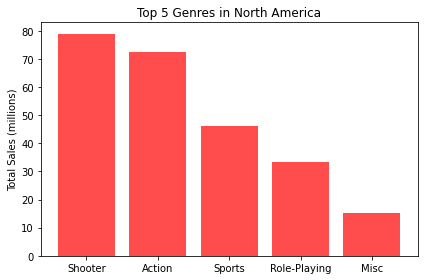

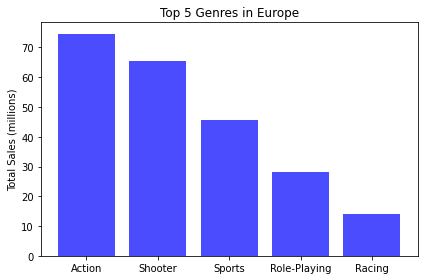

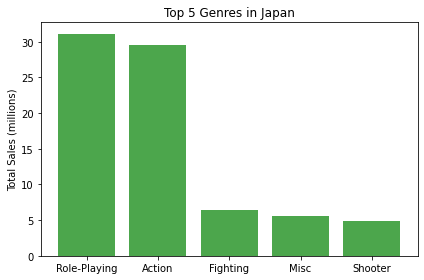

In [61]:
# Create figure and axis objects for NA sales by genre
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 4))

na_genres = past_three_yrs.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
ax1.bar(np.arange(len(na_genres)), na_genres.values, color='red', alpha=0.7)
ax1.set_xticks(np.arange(len(na_genres)))
ax1.set_xticklabels(na_genres.index)
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('Top 5 Genres in North America')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Create figure and axis objects for EU sales by genre
fig, (ax2) = plt.subplots(nrows=1, figsize=(6, 4))

eu_genres = past_three_yrs.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
ax2.bar(np.arange(len(eu_genres)), eu_genres.values, color='blue', alpha=0.7)
ax2.set_xticks(np.arange(len(eu_genres)))
ax2.set_xticklabels(eu_genres.index)
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('Top 5 Genres in Europe')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Create figure and axis objects for JP sales by genre
fig, (ax3) = plt.subplots(nrows=1, figsize=(6, 4))

jp_genres = past_three_yrs.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
ax3.bar(np.arange(len(jp_genres)), jp_genres.values, color='green', alpha=0.7)
ax3.set_xticks(np.arange(len(jp_genres)))
ax3.set_xticklabels(jp_genres.index)
ax3.set_ylabel('Total Sales (millions)')
ax3.set_title('Top 5 Genres in Japan')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<div class="alert alert-info">
 In the bar charts above It showcases that na and eu regions have the same first 3 then the eu enjoys racing games more then platform games . where the jp region people enjoy the role-playing games the most which is not even on the other two regions top 5. they also like action and sports games but they both drop down a spot rather then matching the na and eu regions they do also share a similarity the na region in the the 4th top genre of platform games. 
</div>

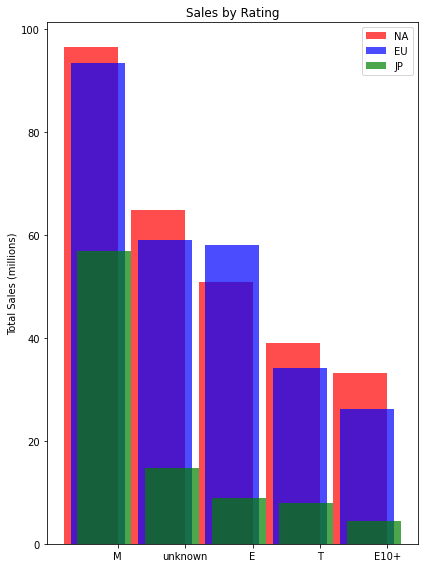

In [62]:

# Ratings
na_ratings = past_three_yrs.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_ratings = past_three_yrs.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_ratings = past_three_yrs.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Create figure and axis objects
fig, (ax3) = plt.subplots(nrows=1, figsize=(6, 8))

# Ratings

ax3.bar(np.arange(len(na_ratings)), na_ratings.values, color='red', alpha=0.7, label='NA')
ax3.bar(np.arange(len(eu_ratings))+0.1, eu_ratings.values, color='blue', alpha=0.7, label='EU')
ax3.bar(np.arange(len(jp_ratings))+0.2, jp_ratings.values, color='green', alpha=0.7, label='JP')
ax3.set_xticks(np.arange(len(na_ratings))+0.4)
ax3.set_xticklabels(na_ratings.index)
ax3.set_ylabel('Total Sales (millions)')
ax3.set_title('Sales by Rating')
ax3.legend()


# Adjust layout and show plot
plt.tight_layout()
plt.show()

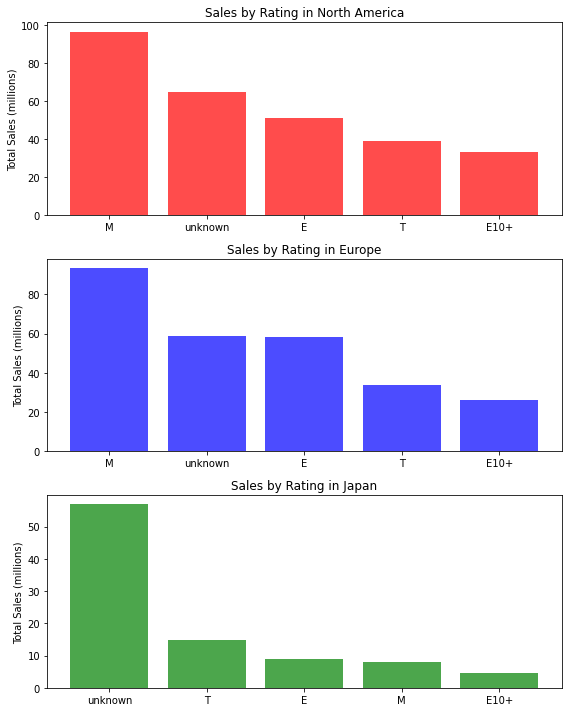

In [63]:
na_ratings = past_three_yrs.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_ratings = past_three_yrs.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_ratings = past_three_yrs.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Create figure and axis objects
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 10))

# North America Ratings
ax1.bar(na_ratings.index, na_ratings.values, color='red', alpha=0.7)
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('Sales by Rating in North America')

# Europe Ratings
ax2.bar(eu_ratings.index, eu_ratings.values, color='blue', alpha=0.7)
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('Sales by Rating in Europe')

# Japan Ratings
ax3.bar(jp_ratings.index, jp_ratings.values, color='green', alpha=0.7)
ax3.set_ylabel('Total Sales (millions)')
ax3.set_title('Sales by Rating in Japan')

# Adjust layout and show plot
plt.tight_layout()
plt.show()









<div class="alert alert-info">
    Overall the esrb rating does not effect the sales in any region but the only one that may have a possiblity is the E rating
    in jp reigion. 
</div>

<div class="alert alert-info">
    <p>I realised this time looking at your example that what I was doing was the wrong approach. I then split each market into there own bar chart for each question that was being asked first I figured out the top platform for all 3 markets, then it was the top genres in all 3 markets then the sales by rating in all 3 main markets.  </p> 
</div>

<div class="alert alert-info">
Null hypthothesis: The average user ratings of the Xbox One and PC platforms are the same.
</div>



In [64]:
xone_data = past_three_yrs[past_three_yrs['platform'] == 'XOne']['user_score'].dropna()
pc_data = past_three_yrs[past_three_yrs['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(xone_data, pc_data)
p_value = results.pvalue

print(p_value)

if p_value >= alpha:
    print("We cannot reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.")
else:
    print("We reject the hypothesis of the average user ratings of Xbox One and PC platforms are the same.")

0.10450507919348415
We cannot reject the hypothesis that the average user ratings of Xbox One and PC platforms are the same.


<div class="alert alert-info">
    <b>update3</b> this hypothesis of average user rating for both the xbox and pc platforms appear to be the same. Conclusion: We cannot reject the null hypothesis because the means of both platform user scores' are the same within 5%; pvalue is greater then the alpha.
</div>



<div class="alert alert-info">
Null hypthothesis: The average user ratings for the Action and Sports genres are not different.
</div>


In [65]:
action = past_three_yrs[past_three_yrs['genre'] == 'Action']['user_score'].dropna()
sports = past_three_yrs[past_three_yrs['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(action, sports, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the hypothesis")
else:
    print("We can't reject the hypothesis")

p-value: 1.1825550382644557e-14
We reject the hypothesis


<div class="alert alert-info">
     we rejected the second test the action sports genres are not different because we used the alpha  and if it was greater then or
    equal to that .05% we accept it if it is less than or equal to we reject it. because we would need more evidence to support it.
    
</div>

 



<div class="alert alert-info">
    <h2>Conclusion</h2>
In this project we came to many conclusions. We found out that the most prominent platforms for the future were the ps4 and the xboxone. we figured out the most popular systems were xbox360, ps2, wii, ps3, and the ds they are all fading off now. then we found out that each region loves action and sports games are in the top 3 for all 3 regions. The na and eu region both have shooting games as there 3rd favorite and role-playing games is what people in Japan love to play the most. Racing games are the 4th most popular in the eu region and the na and jp region both enjoy platform games rather then racing. We also saw that esrbs dont really have a major impact on the sales results. These three markets were very interesting just look at the platforms the na and eu markets are very very similar.they have 4 of the same top platforms Ps4, xboxone, ps3, and 3ds the difference is that xbox360 faded faster in eu then it did in na's market. which lead to the eu enjoying pc games more. the jp market loved the 3ds the most, then the ps4, psv ps3 then the wiiu. no xbox system at all which I thought was very interesting and allows us to truely look at the upcoming market for the jp market in a very different light.  There is also not a major difference in the user rating for xbox or pc platforms and the average user rating in the sports and action genres are not that different after all. hopefully this helps the marketing team in projecting the 2017 results. I hope you enjoyed my updated results and that I made everything more accurate and got deeper into the data as you wanted. Thanks for taking the time to review my project!
</div>


